<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 2: Node Embeddings with GNNs - Matrix Factorization

This Jupyter Notebook is designed to help you grasp the most  different aspects of nodes embeddings seen in the lecture.



In [3]:
%pip install nxt-gem --use-deprecated=legacy-resolver

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached nxt_gem-2.0.3-py3-none-any.whl (1.4 MB)
  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached pbr-6.1.0-py2.py3-none-any.whl (108 kB)
  Using cached tensorflow_intel-2.11.0-cp310-cp310-win_amd64.whl (266.3 MB)


In [1]:
%pip install photonai-graph

  Using cached photonai_graph-0.2.5-py3-none-any.whl.metadata (3.5 kB)
  Using cached photonai-2.5.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached pydot-3.0.3-py3-none-any.whl.metadata (10 kB)
  Using cached dgl-1.0.0-cp310-cp310-win_amd64.whl.metadata (557 bytes)
  Using cached GraKeL-0.1.10-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached igraph-0.11.8-cp39-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached future-1.0.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-win_amd64.whl.metadata (13 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
  Using cached pymodm-0.4.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached prettytable-3.12.0-py3-none-any.whl.metadata (30 kB)
  Using cached seaborn-0.13.2-p

## Import General Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx


## GraphFactorization 

In [3]:
from gem.embedding.gf import GraphFactorization
# Importing necessary libraries


# Creating a barbell graph with 10 fully connected nodes on each side and 4 connecting nodes
G = nx.barbell_graph(m1=10, m2=4)

# GraphFactorization algorithm parameters Initialization
gf = GraphFactorization(d=2, #Dim. of Embeddings
                        data_set=None, #No dataset to guide  the embedding process 
       	                max_iter=10000,# Max training epochs
                        eta=1*10**-4, # Learning Rate
                        regu=1.0 # Regularization Strength
                        )

# Training the algorithm to learn the node embeddings from G
gf.learn_embedding(G)

# Retrieving the computed embeddings for each node
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


### Visualization

Text(0.5, 1.0, 'GF Nodes embedings')

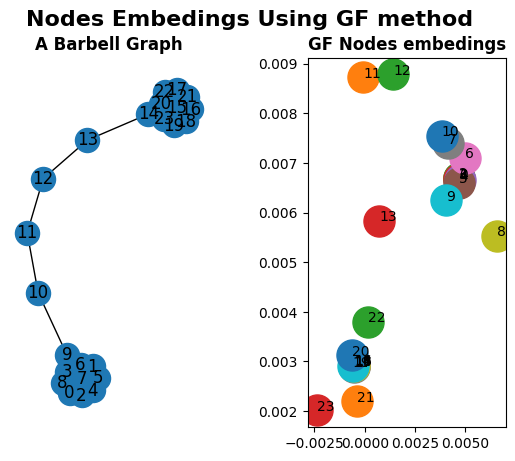

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using GF method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('GF Nodes embedings', fontweight='bold')

## HOPE

In [5]:
# Importing necessary libraries
from gem.embedding.hope import HOPE

# Initializing HOPE with desired parameters
ghope = HOPE(d=4, #Dimension of the embedding space
             beta=0.01)

# Learning the embedding for the given graph
ghope.learn_embedding(G)

# Retrieving the embeddings generated by HOPE
embeddings = ghope.get_embedding()


SVD error (low rank): 0.052092


### Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

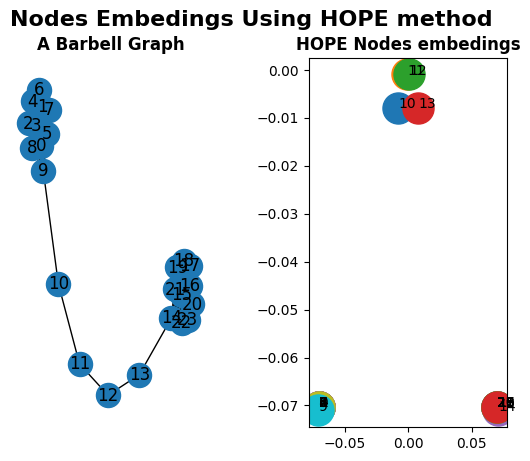

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')

# Challenges:

## Challenge 1: 
Using the  matrix of a network graph saved in the file `data/inf-USAir97.mtx`:
- Create the graph using the follwing code:
```
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_matrix(adj_mat)
```

- Perform Nodes Embedings with the two Matrix Factorization Bsed embedings  Methods: Graph Factorization  and HOPE


In [7]:
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_array(adj_mat)

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


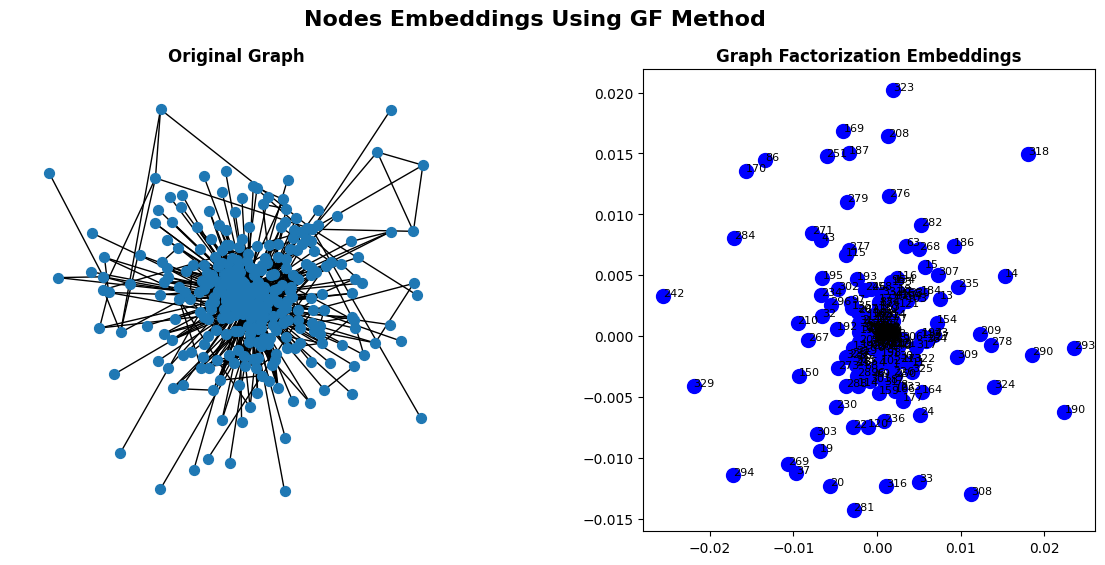

In [10]:
gf = GraphFactorization(d=2, max_iter=10000, eta=1e-4, regu=1.0)
gf.learn_embedding(graph)
gf_embeddings = gf.get_embedding()

#  Visualization
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
nx.draw(graph, with_labels=False, node_size=50, ax=axs[0])
axs[0].set_title('Original Graph', fontweight='bold')
for x in graph.nodes():
    v = gf_embeddings[x]
    axs[1].scatter(v[0], v[1], s=100, c="blue")
    axs[1].annotate(str(x), (v[0], v[1]), fontsize=8)
axs[1].set_title('Graph Factorization Embeddings', fontweight='bold')
fig.suptitle('Nodes Embeddings Using GF Method', fontweight='bold', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.show()

SVD error (low rank): 0.045514


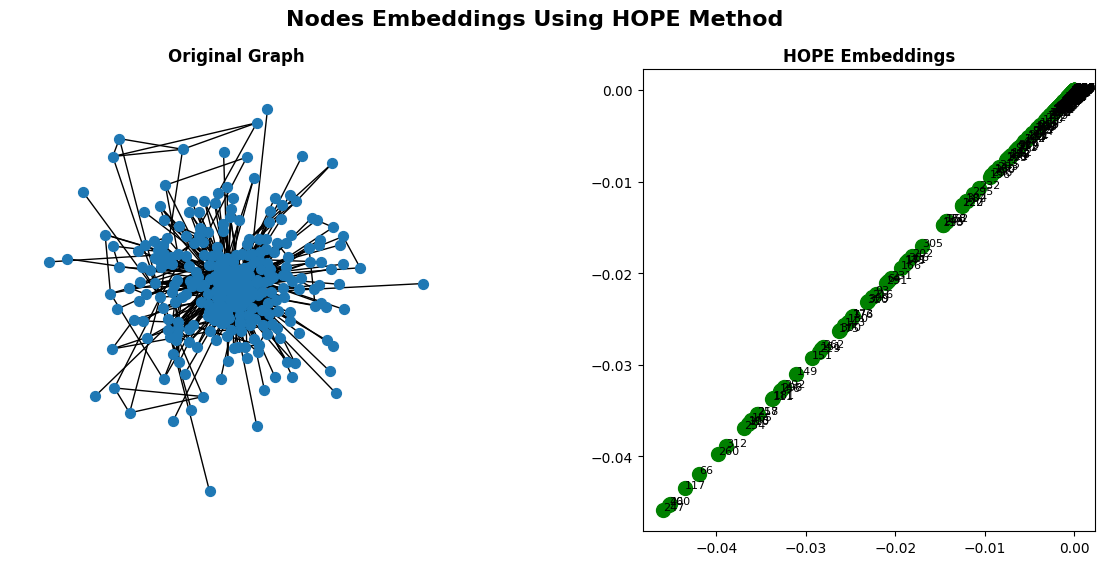

In [11]:
hope = HOPE(d=2, beta=0.01)
hope.learn_embedding(graph)
hope_embeddings = hope.get_embedding()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

nx.draw(graph, with_labels=False, node_size=50, ax=axs[0])
axs[0].set_title('Original Graph', fontweight='bold')

for x in graph.nodes():
    v = hope_embeddings[x]
    axs[1].scatter(v[0], v[1], s=100, c="green")
    axs[1].annotate(str(x), (v[0], v[1]), fontsize=8)
axs[1].set_title('HOPE Embeddings', fontweight='bold')
fig.suptitle('Nodes Embeddings Using HOPE Method', fontweight='bold', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.show()